# Árboles de decisión

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
data = pd.read_csv('../Datasets/Social_Network_Ads.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

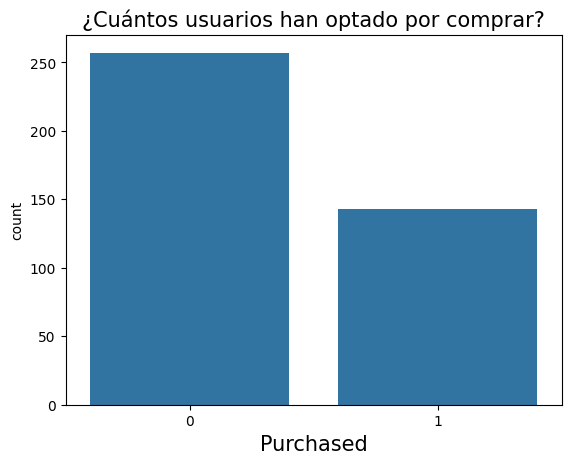

In [4]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

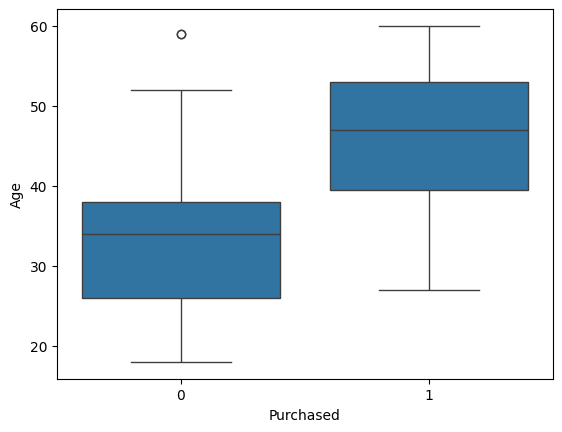

In [5]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

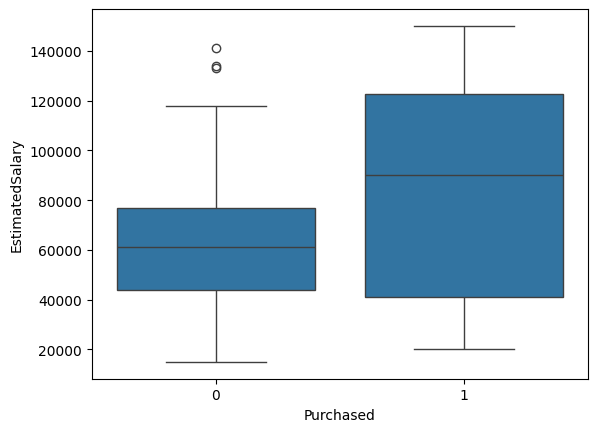

In [6]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


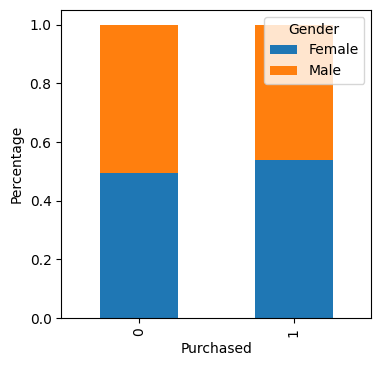

In [7]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

Prueba Chi-Cuadrado
* Ho: no existe dependencia entre las variables
* Ha: existe dependencia entre las variables

In [8]:
variables = ['Gender', 'Purchased']
alpha = 0.05
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        
        contingency_table = pd.crosstab(data[var1], data[var2])
        chi2, p_value, dof, expected = ss.chi2_contingency(contingency_table)
        
        print(f'Prueba Chi-Cuadrado entre {var1} y {var2}:')
        print(f'Estadístico Chi-Cuadrado: {chi2:.2f}')
        print(f'P-valor: {p_value:.2f}')
        
        if p_value < alpha:
            print('La hipótesis nula (Ho) se rechaza.')
            print('Existe dependencia entre las variables.')
        else:
            print('La hipótesis nula (Ho) no se rechaza.')
            print('No existe dependencia entre las variables.')
        print()

Prueba Chi-Cuadrado entre Gender y Purchased:
Estadístico Chi-Cuadrado: 0.56
P-valor: 0.46
La hipótesis nula (Ho) no se rechaza.
No existe dependencia entre las variables.



In [9]:
X = data.iloc[:,[2, 3]].values
y = data.iloc[:,-1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [52]:
cv_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
cv_scores

array([0.875   , 0.765625, 0.828125, 0.84375 , 0.84375 ])

In [53]:
print("cv_scores mean: {}".format(np.mean(cv_scores)))
print("cv_scores std: {}".format(np.std(cv_scores)))

cv_scores mean: 0.83125
cv_scores std: 0.03617449032121946


Tuning
* max_depth: La profundidad máxima del árbol
* min_samples_leaf: El número mínimo de muestras necesarias para estar en un nodo hoja
* criterion: La función para medir la calidad de una división

In [22]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [23]:
grid.best_params_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


In [11]:
classifier = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5).fit(X_train, y_train)
y_pred = classifier.predict(X_test)

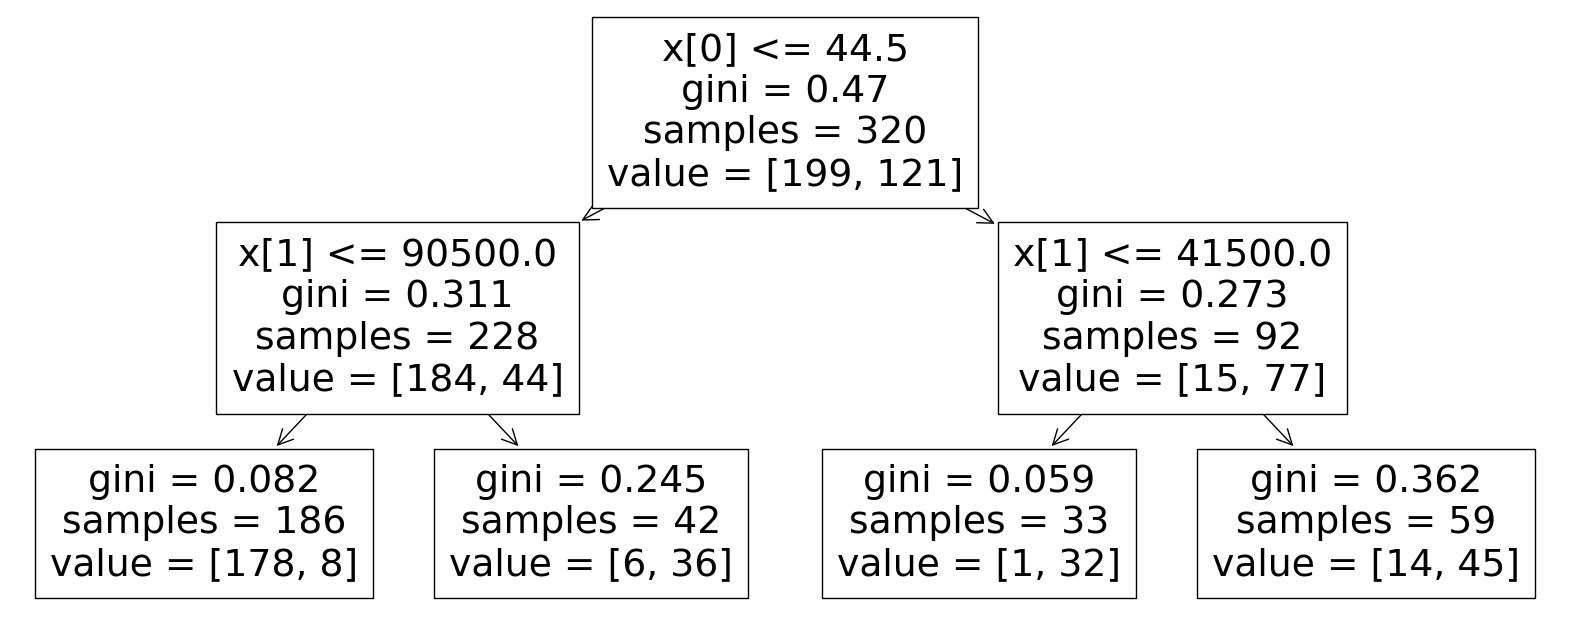

In [25]:
plt.figure(figsize = (20,8))
plot_tree(classifier)
plt.show()

Confusion matrix, without normalization
[[55  3]
 [ 1 21]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.04545455 0.95454545]]


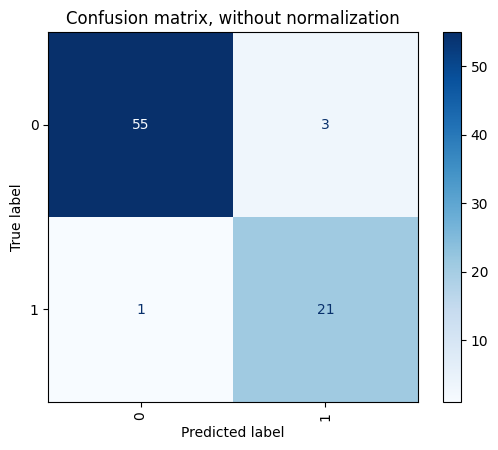

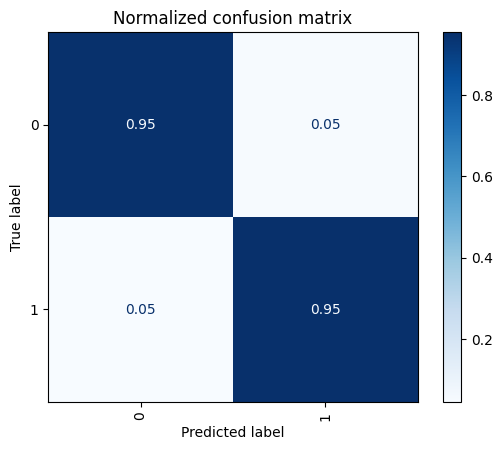

In [41]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm = confusion_matrix(y_test, y_pred)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm if not normalize else cm_normalized)

plt.show()


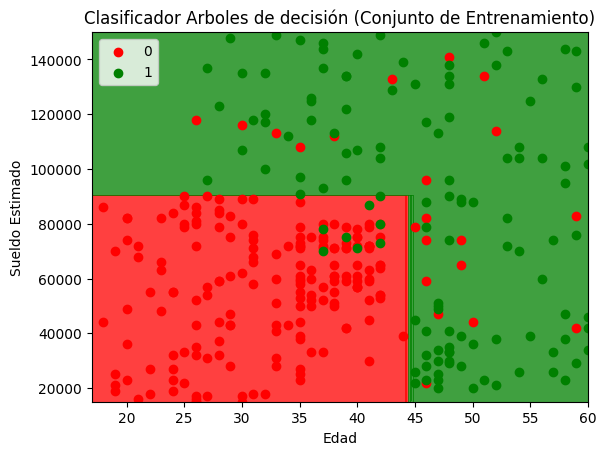

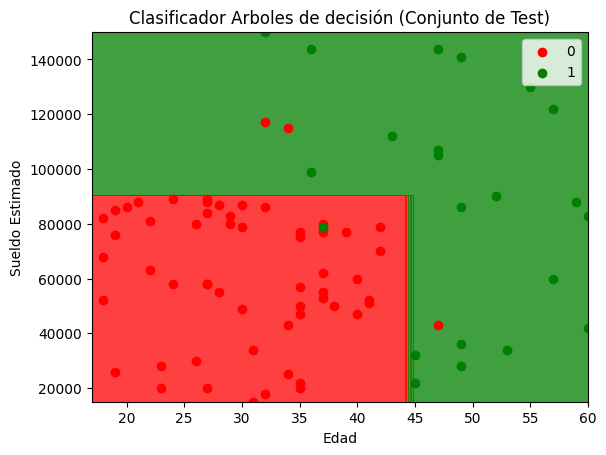

In [13]:
def plot_classifier(classifier, X, y, xlabel, ylabel, title):
    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 1),
                        np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 1))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1],
                    c = ['red', 'green'][i], label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_classifier(classifier, X_train, y_train, "Edad", "Sueldo Estimado" ,"Clasificador Arboles de decisión (Conjunto de Entrenamiento)")
plot_classifier(classifier, X_test, y_test, "Edad", "Sueldo Estimado" ,"Clasificador Arboles de decisión (Conjunto de Test)")

In [43]:
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob[0:5,1]

array([0.04301075, 0.04301075, 0.04301075, 0.04301075, 0.04301075])

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9494514106583072

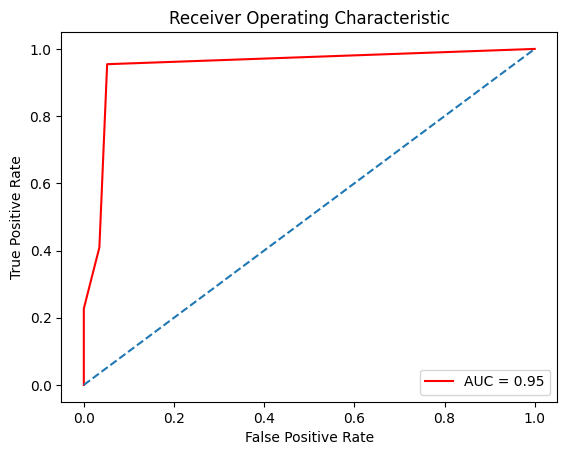

In [45]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [48]:
dataf_combined = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)
dataf_combined.columns = ['Age', 'EstimatedSalary','Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']
dataf_combined.head(10)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,30,87000,0,0,0.956989,0.043011
1,38,50000,0,0,0.956989,0.043011
2,35,75000,0,0,0.956989,0.043011
3,30,79000,0,0,0.956989,0.043011
4,35,50000,0,0,0.956989,0.043011
5,27,20000,0,0,0.956989,0.043011
6,31,15000,0,0,0.956989,0.043011
7,36,144000,1,1,0.142857,0.857143
8,18,68000,0,0,0.956989,0.043011
9,47,43000,0,1,0.237288,0.762712


In [49]:
quantiles = dataf_combined['Purchased_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.043011
0.4    0.043011
0.6    0.043011
0.8    0.762712
Name: Purchased_Pred_Prob_1, dtype: float64

In [51]:
def asignar_categoria(valor):
    if valor <= quantiles.iloc[0]:
        return 'Muy bajo'
    elif valor <= quantiles.iloc[1]:
        return 'Bajo'
    elif valor <= quantiles.iloc[2]:
        return 'Medio'
    elif valor <= quantiles.iloc[3]:
        return 'Alto'
    else:
        return 'Muy alto'

dataf_combined['Score'] = dataf_combined['Purchased_Pred_Prob_1'].apply(asignar_categoria)
dataf_combined

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1,Score
0,30,87000,0,0,0.956989,0.043011,Muy bajo
1,38,50000,0,0,0.956989,0.043011,Muy bajo
2,35,75000,0,0,0.956989,0.043011,Muy bajo
3,30,79000,0,0,0.956989,0.043011,Muy bajo
4,35,50000,0,0,0.956989,0.043011,Muy bajo
...,...,...,...,...,...,...,...
75,18,82000,0,0,0.956989,0.043011,Muy bajo
76,42,79000,0,0,0.956989,0.043011,Muy bajo
77,40,60000,0,0,0.956989,0.043011,Muy bajo
78,53,34000,1,1,0.030303,0.969697,Muy alto
